# Tasks

1) Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

*italicized text*

In [ ]:
import pandas as pd
data=pd.read_csv('/content/Salaries.csv')

print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


2) Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard **deviation**.

In [ ]:
import pandas as pd

data=pd.read_csv('/content/Salaries.csv')

for x in data.index:
  if data.loc[x, "TotalPay"] < 0:
    data.loc[x, "TotalPay"] = -data.loc[x, "TotalPay"]
#handling negative values and making it positive

mean=data["TotalPay"].mean()
median=data["TotalPay"].median()
mode=data["TotalPay"].mode()
min=data["TotalPay"].min()
max=data["TotalPay"].max()
standard_deviation = data["TotalPay"].std()
print('Mean :',mean)
print('Median :',median)
print('Mode :',mode)
print('min',min)
print('max',max)
print('Rang of salaries : from',min,' to ',max)
print('Standard Deviation : ',standard_deviation)


Mean : 74768.33028805145
Median : 71426.60999999999
Mode : 0    0.0
Name: TotalPay, dtype: float64
min 0.0
max 567595.43
Rang of salaries : from 0.0  to  567595.43
Standard Deviation :  50516.992965134625


3) Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [ ]:
import pandas as pd

data=pd.read_csv('/content/Salaries.csv')

data.drop('Status',axis = 1,inplace=True)
data.drop('Notes',axis = 1,inplace=True)
#droping Status,Notes colums because they don't have any values

for x in data.index:
  if data.loc[x, "TotalPay"] < 0:
    data.loc[x, "TotalPay"] = -data.loc[x, "TotalPay"]
#handling negative values and making it positive

data['BasePay'].fillna(data['BasePay'].mean(),inplace=True)
data['OvertimePay'].fillna(data['OvertimePay'].mean(),inplace=True)
data['OtherPay'].fillna(data['OtherPay'].mean(),inplace=True)
data['Benefits'].fillna(data['BasePay'].mean(),inplace=True)
#filling the empty elements in the BasePay,OvertimePay,OtherPay,Benefits with the mean value of each colume so than they don't affect so much when anlaysing the data



print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB
None


4) Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

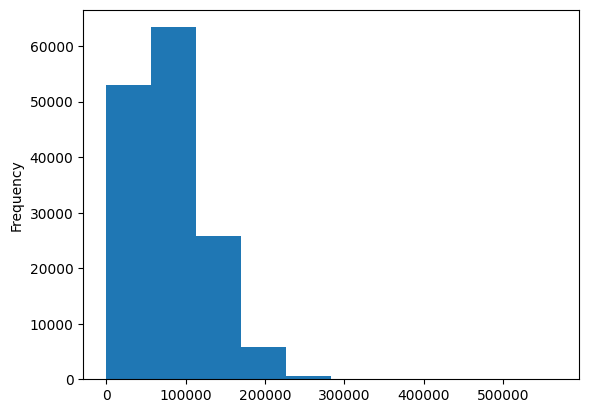

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#histogram
data=pd.read_csv('/content/Salaries.csv')
data['TotalPay'].plot(kind='hist')
plt.show()

<Axes: >

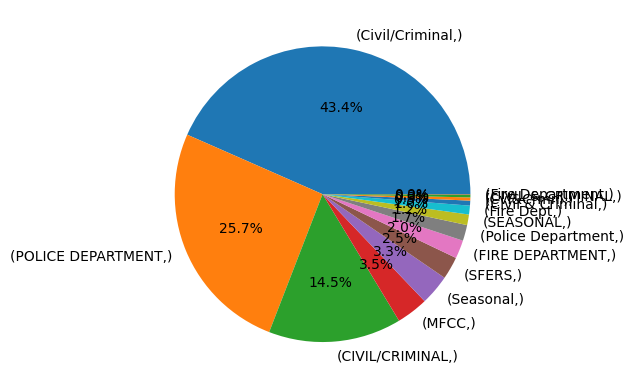

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#pie chart:
data=pd.read_csv('/content/Salaries.csv')

dep = r'\((.*?)\)'

count=data['JobTitle'].str.extract(dep).value_counts()
count.plot(kind='pie', autopct='%1.1f%%')


5) Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Salaries.csv')

grouped=data.groupby('JobTitle')
count_grouped=grouped.size()
print('Number of employees in each group:')
print(count_grouped)
base_salaries_grouped=grouped['BasePay'].mean()
print()
print('Mean base salary in each group')
print(base_salaries_grouped)
mean_salaries_grouped=grouped['TotalPay'].mean()
print()
print('Average salary in each group:')
print(mean_salaries_grouped)

Number of employees in each group:
JobTitle
ACCOUNT CLERK                                      83
ACCOUNTANT                                          5
ACCOUNTANT INTERN                                  48
ACPO,JuvP, Juv Prob (SFERS)                         1
ACUPUNCTURIST                                       1
                                                 ... 
X-RAY LABORATORY AIDE                              26
X-Ray Laboratory Aide                             100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS      1
Youth Comm Advisor                                  4
ZOO CURATOR                                         1
Length: 2159, dtype: int64

Mean base salary in each group
JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                             

6) Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

The correlation between the BasePay and TotalPay is : 0.9457150104450964



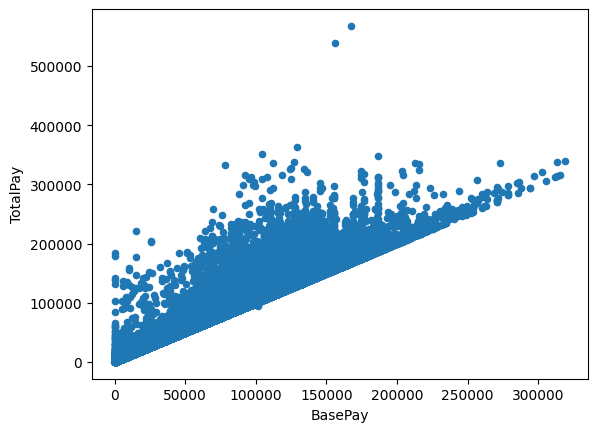

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/Salaries.csv')

correl=data['BasePay'].corr(data['TotalPay'])
print('The correlation between the BasePay and TotalPay is :',correl)
print()

data.plot(kind='scatter',x='BasePay',y='TotalPay')
plt.show()

7) Summary of Insights: Write a brief report summarizing the findings and insights from the analyses.

It seems that we have 14 department with 148654 employee having a range of salaries form 0 to 567595.43 and an avreage salaries of 74768 the correlation between the base salary and and total pay is very good since it's 0.945, all employees are related to the same agency in San Francisco.